<a href="https://colab.research.google.com/github/harrshat/MachineLearningReferenceDocs/blob/main/Algerian_Forest_Fires_Model_to_Cloud_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [187]:
df=pd.read_csv("/content/Algerian_forest_fires_dataset_UPDATE.csv")

In [188]:
df.head(3)

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire


In [189]:
df=pd.read_csv("/content/Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Aim of the regression model is to predict 'Temperature'

- Temperature is dependent feature

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [191]:
df[df.isnull().any(axis=1)]

# 1-122: Bijaia
# Rest: Sidi-Bel Abbes Region Dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [192]:
df.loc[:122,"Region"]=0 #Bijaia
df.loc[122:,"Region"]=1 #Sidi Bel
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0


In [193]:
df[['Region']]=df[['Region']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [194]:
df.isnull().sum()

,0
day,0
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [195]:
df=df.dropna().reset_index(drop=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [196]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [197]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [198]:
df=df.drop(122).reset_index(drop=True)

In [199]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [200]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [201]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [202]:
columns_int=['day', 'month', 'year', 'Temperature', 'RH', 'Ws']
columns_float=['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']

df[columns_int]=df[columns_int].astype(int)
df[columns_float]=df[columns_float].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [203]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [204]:
df.to_csv("Algerian_Forest_Fire_cleaned.csv",index=False)

In [205]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


## Exploratory Data Analysis

In [206]:
# Drop day, month, year
df_copy=df.drop(['day','month','year'],axis=1)

In [207]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [208]:
df_copy['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [209]:
df_copy['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [210]:
df_copy['Classes'].value_counts()

,count
Classes,
1,137
0,106


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

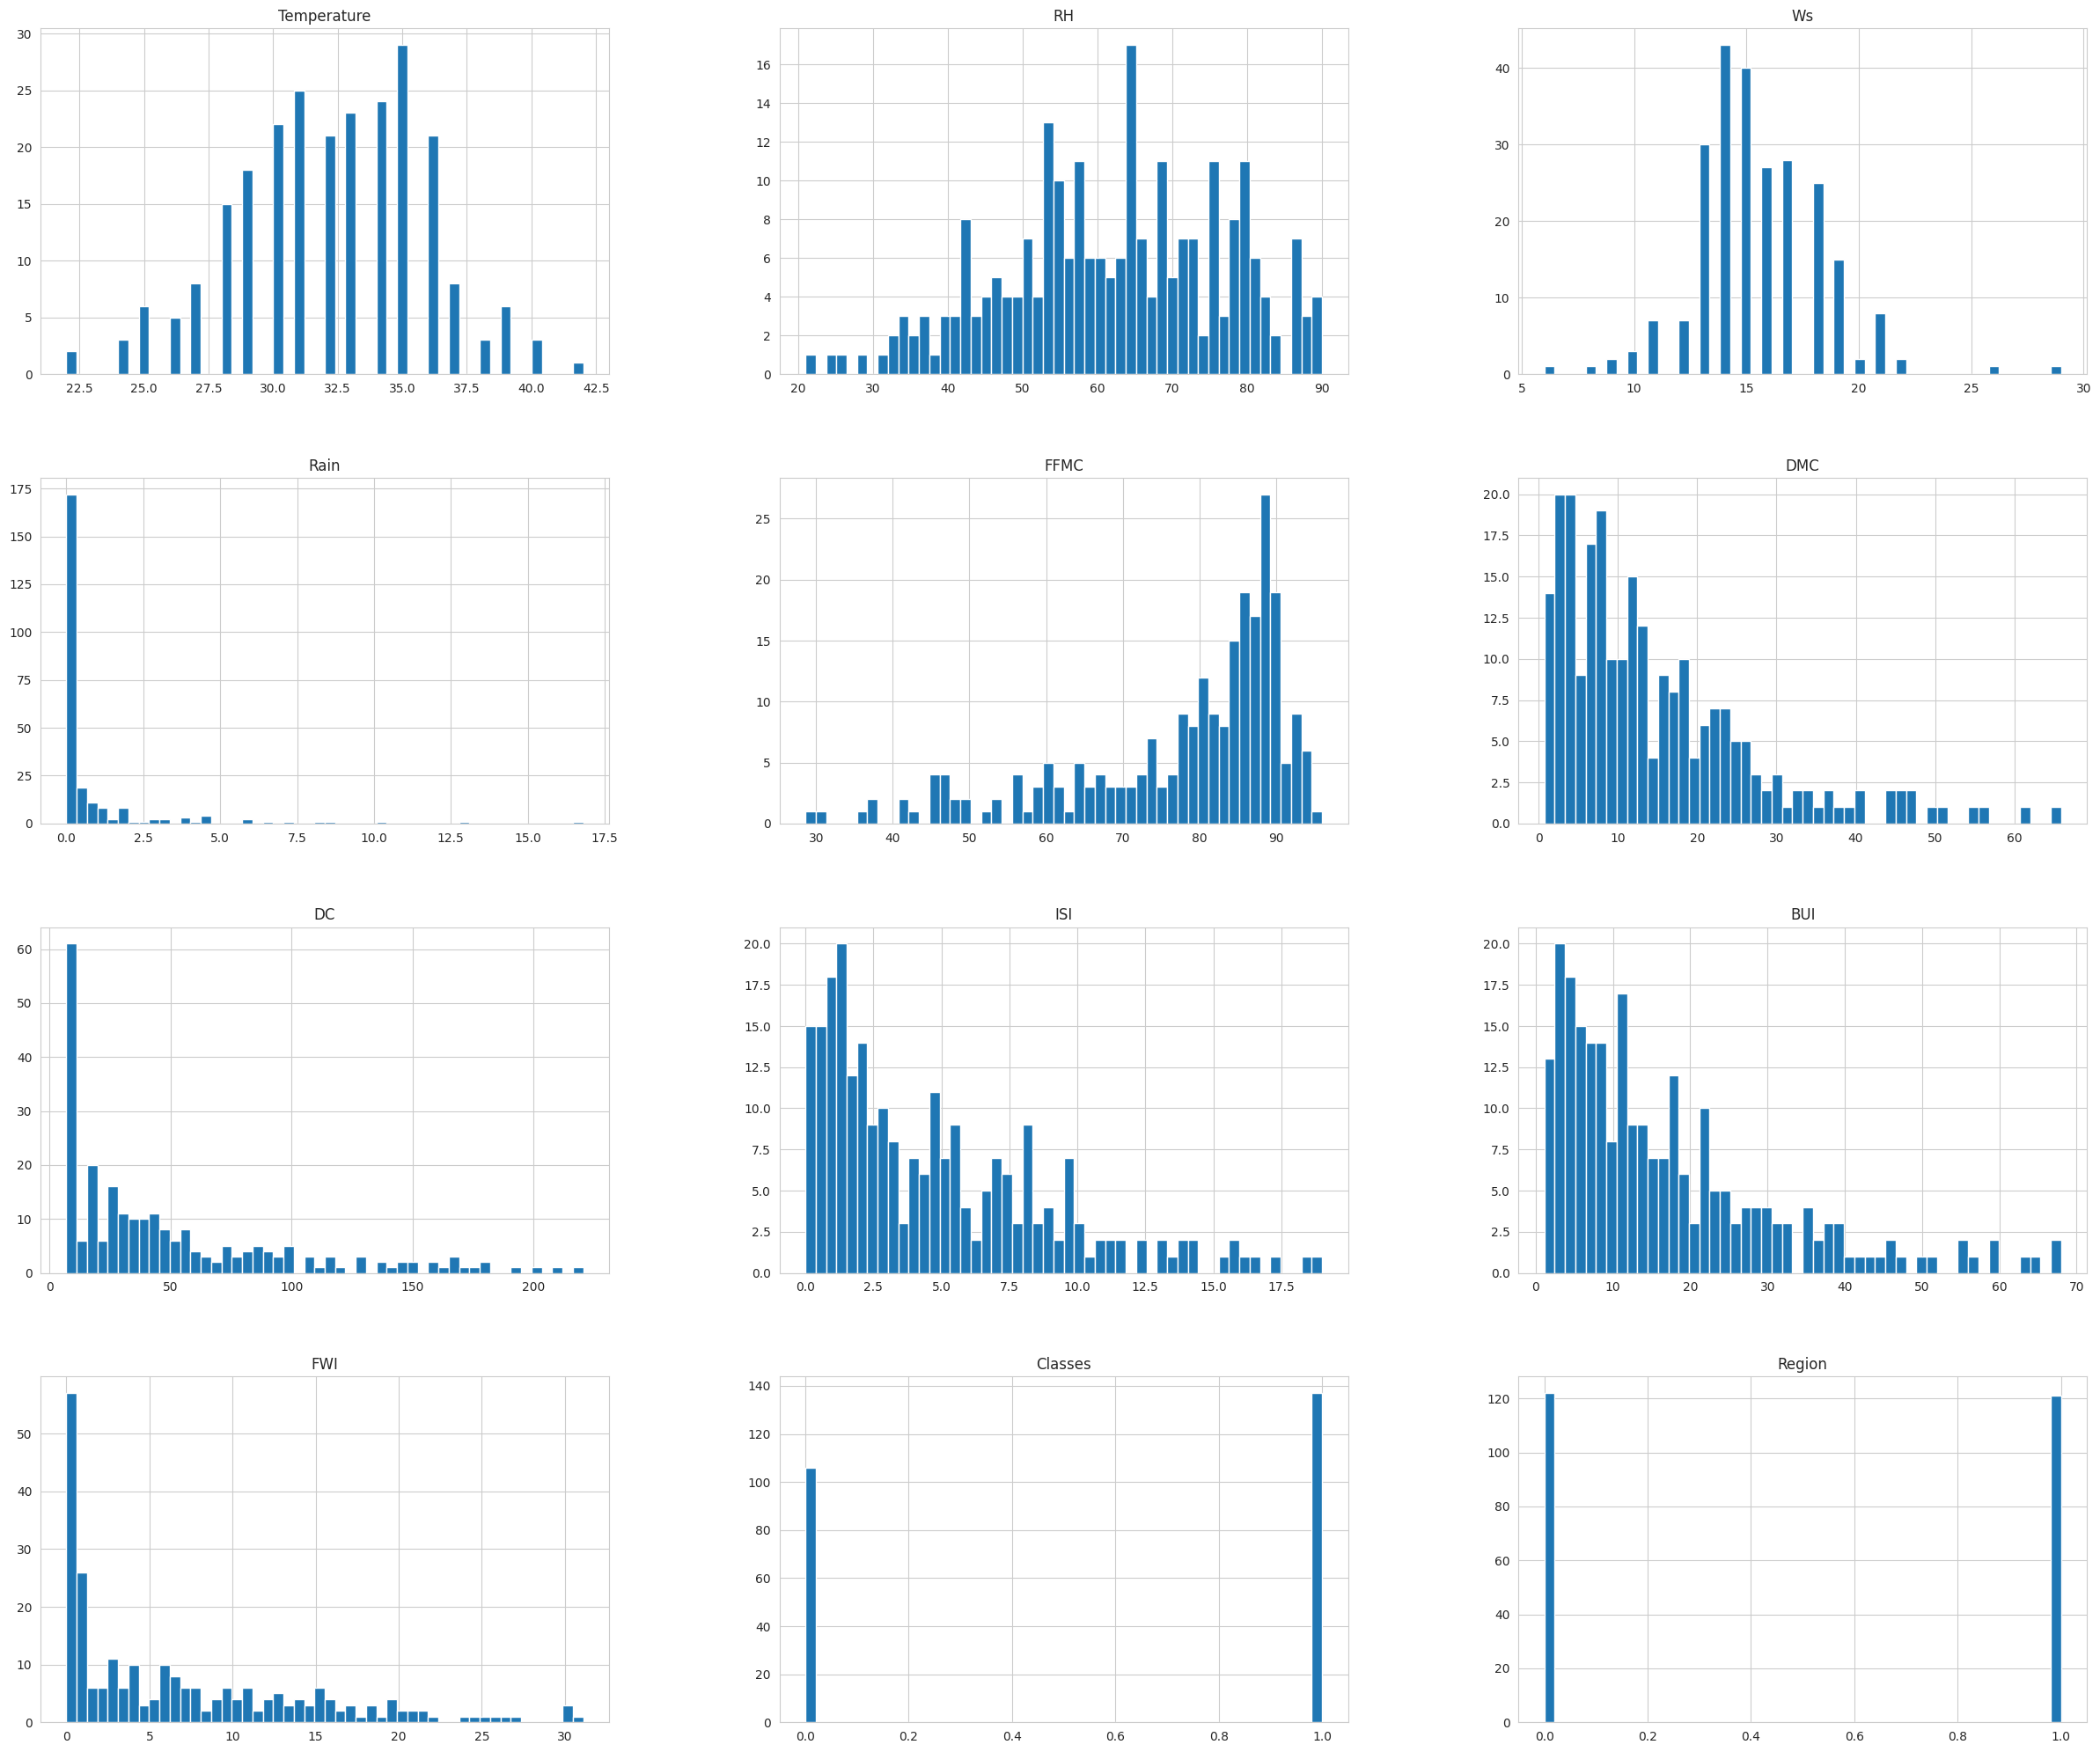

In [211]:
df_copy.hist(bins=50,figsize=(30,25))

In [212]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100
percentage

,proportion
Classes,
1,56.378601
0,43.621399


([<matplotlib.patches.Wedge at 0x7fa18deb8260>,
 [Text(-0.2189564657232264, 1.0779879712306597, 'not fire'),
  Text(0.21895655996393085, -1.0779879520888727, 'fire')],
 [Text(-0.11943079948539621, 0.5879934388530871, '56.4%'),
  Text(0.11943085088941681, -0.5879934284121123, '43.6%')])

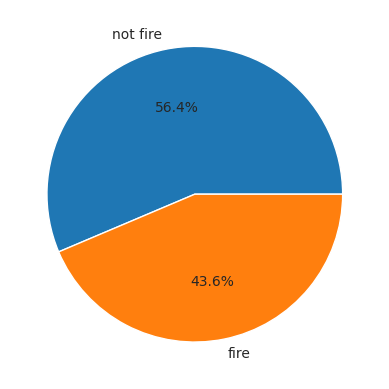

In [213]:
plt.pie(percentage,labels=['not fire','fire'],autopct='%1.1f%%')

<Axes: >

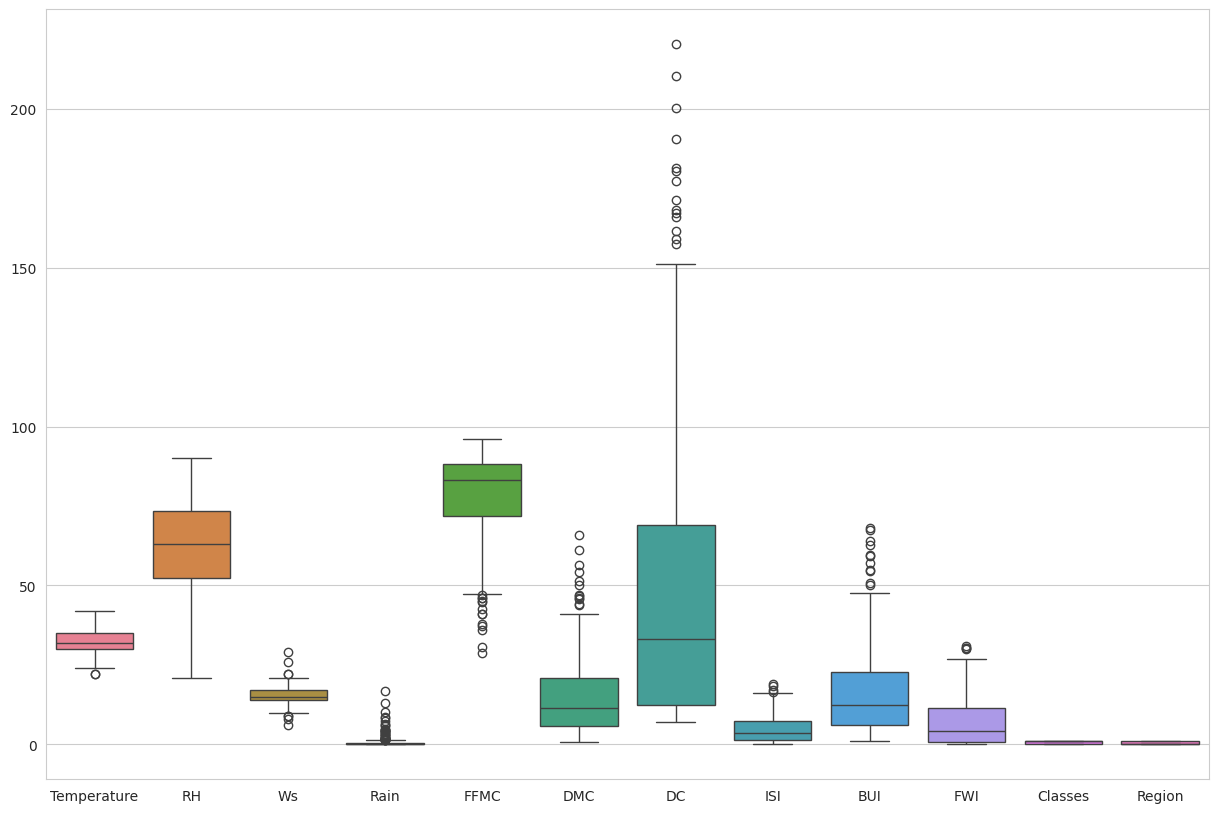

In [214]:
# Checking for outliers
plt.figure(figsize=(15,10))
sns.boxplot(df_copy)

In [215]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Monthly fire analysis of Sidi- Bel Region')

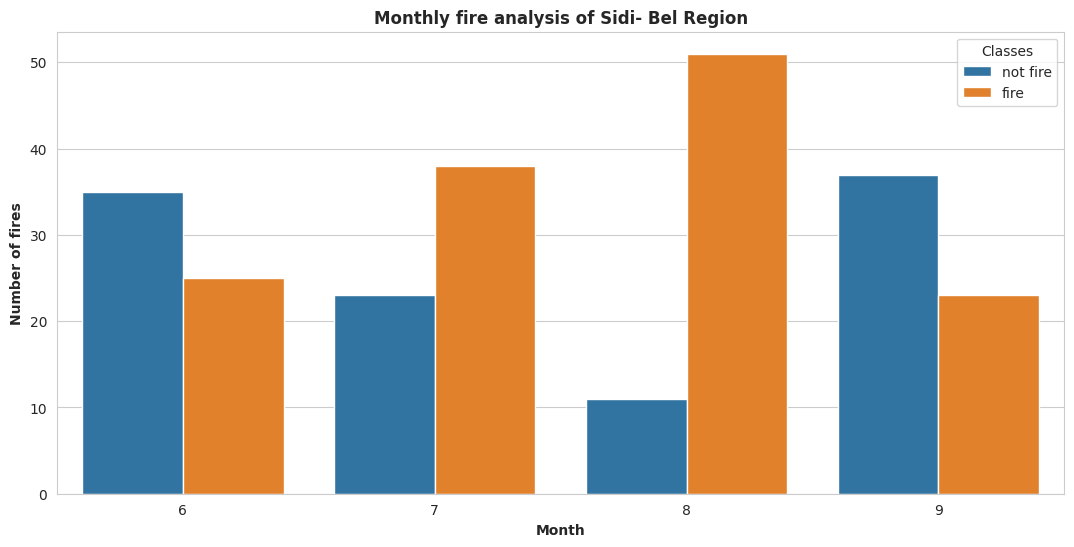

In [216]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x=df['month'],hue='Classes',data=df)
plt.xlabel("Month",weight='bold')
plt.ylabel("Number of fires",weight='bold')
plt.title("Monthly fire analysis of Sidi- Bel Region",weight='bold')
# Maximum fires in August -- during summer month

Text(0.5, 1.0, 'Monthly fire analysis of Bejaia Region')

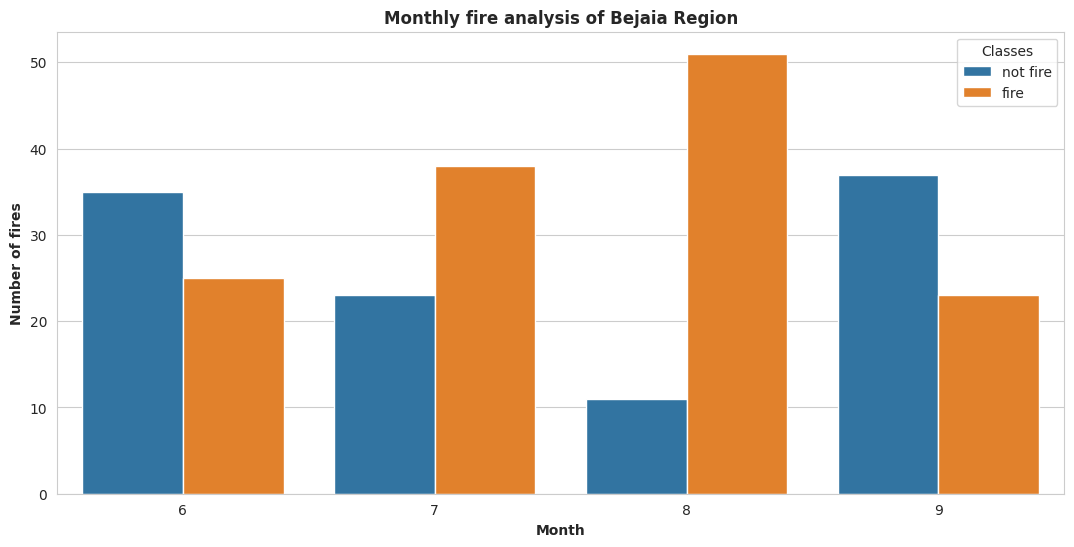

In [217]:
dftemp=df[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x=df['month'],hue='Classes',data=df)
plt.xlabel("Month",weight='bold')
plt.ylabel("Number of fires",weight='bold')
plt.title("Monthly fire analysis of Bejaia Region",weight='bold')
# Here also, maximum fires in August -- during summer month

In [218]:
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0


In [220]:
# Dependent and Independent Features
df_copy.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0


In [221]:
X=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [222]:
X.shape

(243, 11)

In [223]:
y.shape

(243,)

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)


In [229]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [234]:
# Feature Selection using correlation - Input features
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [256]:
dct={}
for col in X_train.corr():
  for i in X_train.columns:
    if col!=i:
      if(abs(X_train.corr().loc[col][i])>0.85):
        dct[col]=i

In [258]:
dct
# 'BUI','DC','DMC'

{'DMC': 'BUI', 'DC': 'BUI', 'BUI': 'DC'}

In [255]:
#or
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(dataset.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr
corr_features= correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [260]:
X_train.drop(['BUI','DC'],axis=1,inplace=True)
X_test.drop(['BUI','DC'],axis=1,inplace=True)

In [261]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

## Feature Scaling or Standardization

In [262]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [263]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

<Axes: title={'center': 'Before Scaling - X_train'}>

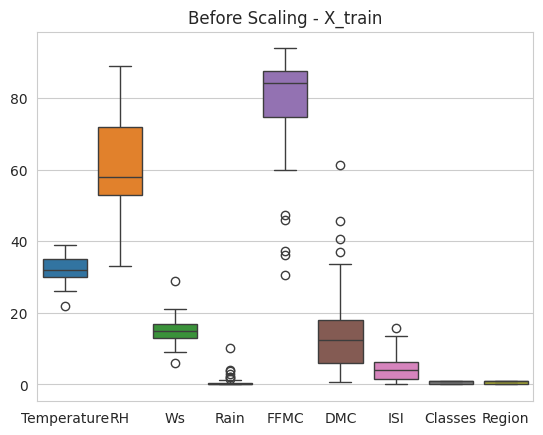

In [264]:
plt.title("Before Scaling - X_train")
sns.boxplot(X_test)

<Axes: title={'center': 'After Scaling - X_train'}>

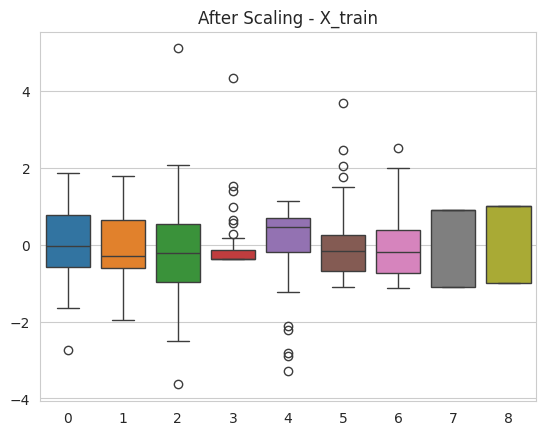

In [265]:
plt.title("After Scaling - X_train")
sns.boxplot(X_test_scaled)

## Linear Regression Model

Mean Squared Error:  0.6742766873791607
Root Mean Squared Error:  0.8211435242265268
Mean Absolute Error:  0.5468236465249986
Accuracy: R2 score:  98.47657384266951 %


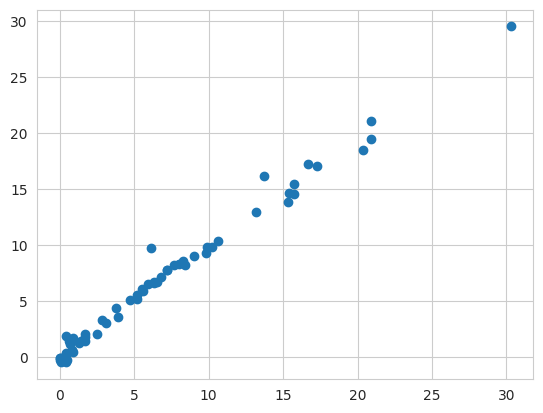

In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
regression= LinearRegression()
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",np.sqrt(mse))
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)
score=r2_score(y_test,y_pred)
print("Accuracy: R2 score: ",score*100,"%")
plt.scatter(y_test,y_pred)

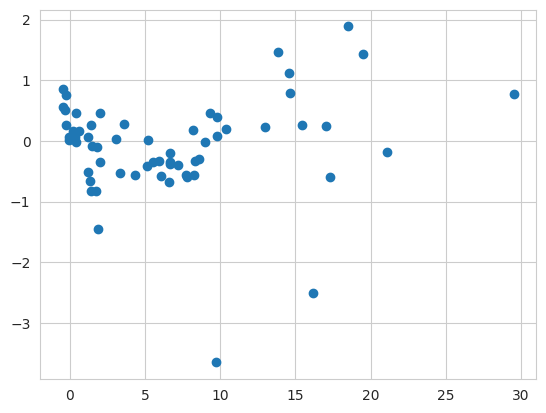

In [275]:
# Assumptions
# Residuals
residuals=y_test-y_pred
residuals
plt.scatter(y_pred,residuals)

## Lasso v/s Ridge
- Lasso (L1) is excellent for feature selection because it can shrink unimportant coefficients to exactly zero, effectively removing features
- Ridge (L2) prevents overfitting by shrinking all coefficients towards zero but rarely to zero, keeping all features but reducing their impact.

## Lasso Regression (L1 Regularization)- for Feature Selection

Mean Squared Error:  2.2483458918974772
Root Mean Squared Error:  1.4994485292591664
Mean Absolute Error:  1.133175994914409
Accuracy: R2 score:  94.92020263112389 %


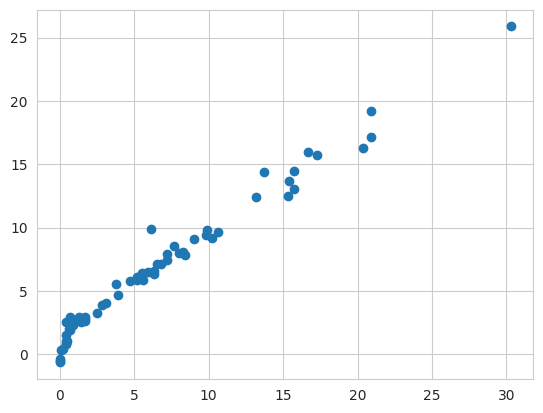

In [276]:
from sklearn.linear_model import Lasso
#alpha value is 1.0 by default
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",np.sqrt(mse))
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)
score=r2_score(y_test,y_pred)
print("Accuracy: R2 score: ",score*100,"%")
plt.scatter(y_test,y_pred)

In [283]:
lasso.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        2.99025157,  4.00824747,  0.        , -0.        ])

## Lasso Cross Validation

Mean Squared Error:  0.792499555474362
Root Mean Squared Error:  0.8902244410677355
Mean Absolute Error:  0.619970115826343
Accuracy: R2 score:  98.20946715928275 %


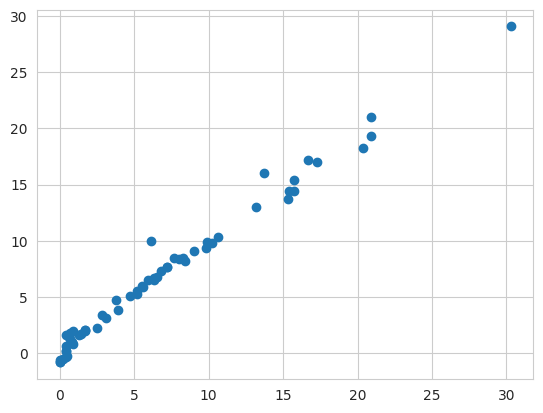

In [285]:
from sklearn.linear_model import LassoCV
lasso_cv=LassoCV(cv=5)
lasso_cv.fit(X_train_scaled,y_train)
y_pred=lasso_cv.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",np.sqrt(mse))
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)
score=r2_score(y_test,y_pred)
print("Accuracy: R2 score: ",score*100,"%")
plt.scatter(y_test,y_pred)

In [287]:
lasso_cv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [288]:
lasso_cv.coef_

array([-0.        , -0.        ,  0.        ,  0.        , -0.40063928,
        3.60177292,  4.7999393 ,  0.16408964, -0.3022766 ])

In [289]:
lasso.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        2.99025157,  4.00824747,  0.        , -0.        ])

In [290]:
regression.coef_

array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
        3.6982583 ,  4.84057298,  0.40422124, -0.39259928])

# Ridge Regression Model - L2 Regularization




Mean Squared Error:  0.6949198918152074
Root Mean Squared Error:  0.8336185529456548
Mean Absolute Error:  0.5642305340105692
Accuracy: R2 score:  98.42993364555514 %


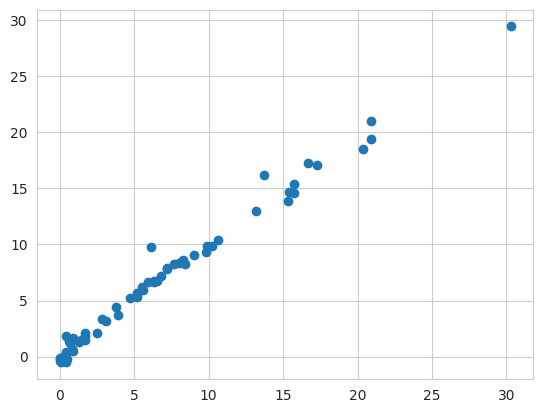

In [291]:
from sklearn.linear_model import Ridge
ridge_mdl=Ridge()
ridge_mdl.fit(X_train_scaled,y_train)
y_pred=ridge_mdl.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",np.sqrt(mse))
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)
score=r2_score(y_test,y_pred)
print("Accuracy: R2 score: ",score*100,"%")
plt.scatter(y_test,y_pred)

In [292]:
ridge_mdl.coef_

array([-0.02692577, -0.20519212,  0.02554428, -0.04069202, -0.78583006,
        3.68286744,  4.74488835,  0.43423672, -0.38466214])

# Ridge CV

Mean Squared Error:  0.6949198918152074
Root Mean Squared Error:  0.8336185529456548
Mean Absolute Error:  0.5642305340105692
Accuracy: R2 score:  98.42993364555514 %


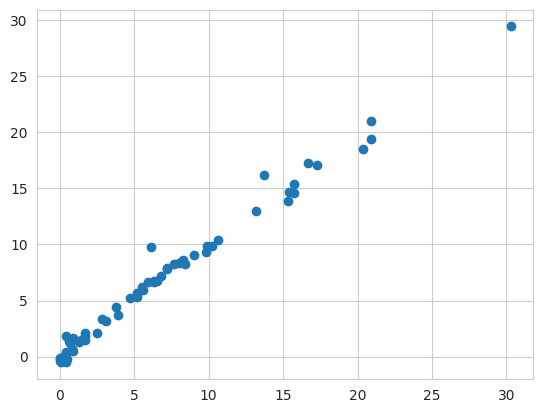

In [294]:
from sklearn.linear_model import RidgeCV
ridge_cv=RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled,y_train)
y_pred=ridge_cv.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",np.sqrt(mse))
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)
score=r2_score(y_test,y_pred)
print("Accuracy: R2 score: ",score*100,"%")
plt.scatter(y_test,y_pred)

In [296]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# ElasticNet Regression

Mean Squared Error:  5.5172511010252245
Root Mean Squared Error:  2.3488829474933874
Mean Absolute Error:  1.8822353634896005
Accuracy: R2 score:  87.53460589519703 %


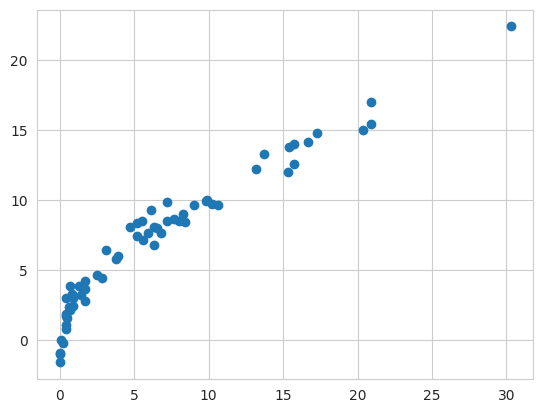

In [297]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet()
elastic_net.fit(X_train_scaled,y_train)
y_pred=elastic_net.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",np.sqrt(mse))
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)
score=r2_score(y_test,y_pred)
print("Accuracy: R2 score: ",score*100,"%")
plt.scatter(y_test,y_pred)

# ElasticNet CV

Mean Squared Error:  0.8222830416276258
Root Mean Squared Error:  0.906798236449336
Mean Absolute Error:  0.6575946731430898
Accuracy: R2 score:  98.14217587854941 %


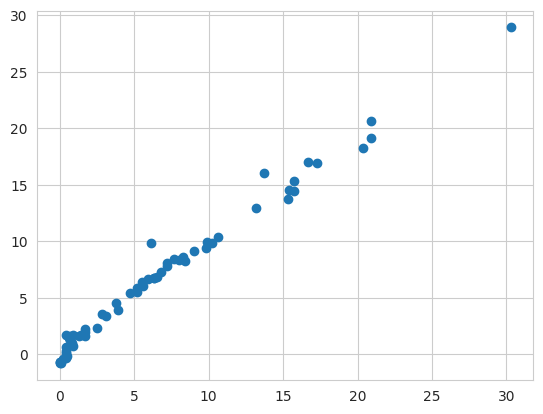

In [299]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv=ElasticNetCV(cv=5)
elastic_net_cv.fit(X_train_scaled,y_train)
y_pred=elastic_net_cv.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",np.sqrt(mse))
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)
score=r2_score(y_test,y_pred)
print("Accuracy: R2 score: ",score*100,"%")
plt.scatter(y_test,y_pred)

In [300]:
elastic_net_cv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [301]:
import pickle

In [302]:
# Choose model with best accuracy - here, let's consider elastic net cv
pickle.dump(elastic_net_cv,open('algerian_fires_elasticnetcv.pkl','wb'))


In [303]:
model=pickle.load(open('algerian_fires_elasticnetcv.pkl','rb'))

In [305]:
#Test
model.predict(X_test_scaled)

array([ 8.26896303,  7.80499035, -0.10373519,  4.5910001 ,  6.88725274,
        1.59410811,  2.35512483,  8.0623476 ,  1.72415002,  3.53713054,
        0.6324586 ,  9.86752845,  9.43037004, 16.93741658, 18.24537235,
        1.65750426,  1.70187606, -0.64660717,  7.25494999,  3.39769372,
        1.6585457 ,  0.11316128,  6.66222016,  0.2768868 , 20.66780763,
        5.47501303,  6.05587139,  9.84868106, -0.65326652,  9.93266416,
        6.72851251, -0.29425171, 10.39747097, 14.48835483,  1.70083377,
        0.73634118,  2.25453683,  6.37570352, -0.71507088, -0.36129277,
        6.8083341 ,  1.96274355,  8.60448104, -0.79781122, 15.32067065,
        8.39541208,  8.43742252,  1.41818555, 13.00237268,  1.28988758,
       28.93275959,  5.88819725, 17.04972357, 19.1125176 , 13.71477759,
       16.09820311,  0.99493652,  9.16486312,  3.91448039, 14.57731138,
        5.50092909])